Ajuste lineal del barrido de frecuencias contra la corriente para ambos isotopos del rubidio

Pendiente para Rb 87: 392.38 ± 19.36 kHz/A
Pendiente para Rb 85: 253.27 ± 27.33 kHz/A


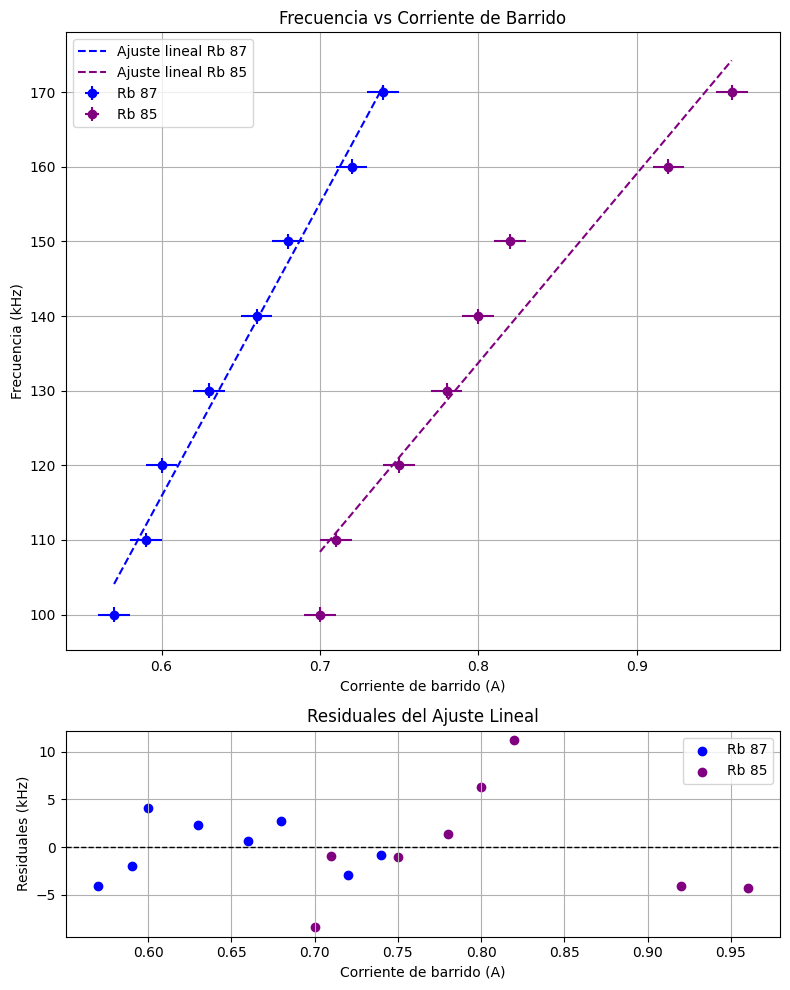

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos
frecuencia = np.array([100, 110, 120, 130, 140, 150, 160, 170])
corriente_Rb87 = np.array([0.57, 0.59, 0.6, 0.63, 0.66, 0.68, 0.72, 0.74])
corriente_Rb85 = np.array([0.7, 0.71, 0.75, 0.78, 0.8, 0.82, 0.92, 0.96])

# Incertidumbres
error_corriente = 0.01
error_frecuencia = 1

# Ajuste lineal para Rb 87
slope_Rb87, intercept_Rb87, r_value_Rb87, p_value_Rb87, std_err_Rb87 = linregress(corriente_Rb87, frecuencia)
frecuencia_fit_Rb87 = slope_Rb87 * corriente_Rb87 + intercept_Rb87

# Ajuste lineal para Rb 85
slope_Rb85, intercept_Rb85, r_value_Rb85, p_value_Rb85, std_err_Rb85 = linregress(corriente_Rb85, frecuencia)
frecuencia_fit_Rb85 = slope_Rb85 * corriente_Rb85 + intercept_Rb85

# Cálculo de residuales
residuales_Rb87 = frecuencia - frecuencia_fit_Rb87
residuales_Rb85 = frecuencia - frecuencia_fit_Rb85

# Crear figura
fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [3, 1]})

# Gráfico principal (frecuencia vs corriente)
axs[0].errorbar(corriente_Rb87, frecuencia, xerr=error_corriente, yerr=error_frecuencia, fmt='o', label='Rb 87', color='blue')
axs[0].errorbar(corriente_Rb85, frecuencia, xerr=error_corriente, yerr=error_frecuencia, fmt='o', label='Rb 85', color='purple')
axs[0].plot(corriente_Rb87, frecuencia_fit_Rb87, '--', color='blue', label='Ajuste lineal Rb 87')
axs[0].plot(corriente_Rb85, frecuencia_fit_Rb85, '--', color='purple', label='Ajuste lineal Rb 85')
axs[0].set_xlabel('Corriente de barrido (A)')
axs[0].set_ylabel('Frecuencia (kHz)')
axs[0].set_title('Frecuencia vs Corriente de Barrido')
axs[0].legend()
axs[0].grid()

# Gráfico de residuales
axs[1].scatter(corriente_Rb87, residuales_Rb87, color='blue', label='Rb 87')
axs[1].scatter(corriente_Rb85, residuales_Rb85, color='purple', label='Rb 85')
axs[1].axhline(0, color='black', linestyle='--', linewidth=1)
axs[1].set_xlabel('Corriente de barrido (A)')
axs[1].set_ylabel('Residuales (kHz)')
axs[1].set_title('Residuales del Ajuste Lineal')
axs[1].legend()
axs[1].grid()

# Ajustar diseño
plt.tight_layout()

# Mostrar pendientes con incertidumbre
print(f"Pendiente para Rb 87: {slope_Rb87:.2f} ± {std_err_Rb87:.2f} kHz/A")
print(f"Pendiente para Rb 85: {slope_Rb85:.2f} ± {std_err_Rb85:.2f} kHz/A")

# Guardar y mostrar
plt.savefig('frecuencia_corriente_residuales.png')
plt.show()


Ajuste para encontrar campo magnetico teórico

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Constantes
mu_B = 9.274009994e-24  # Magnetón de Bohr (J/T)
h = 6.62607015e-34  # Constante de Planck (J·s)
frecuencia = np.array([100, 110, 120, 130, 140, 150, 160, 170]) * 1e3  # Frecuencia en Hz
corriente_Rb87 = np.array([0.57, 0.59, 0.6, 0.63, 0.66, 0.68, 0.72, 0.74])
corriente_Rb85 = np.array([0.7, 0.71, 0.75, 0.78, 0.8, 0.82, 0.92, 0.96])

gF_Rb87 = -1/2
gF_Rb85 = -1/3

# Calcular campo magnético teórico
B_Rb87 = frecuencia / (gF_Rb87 * mu_B / h)
B_Rb85 = frecuencia / (gF_Rb85 * mu_B / h)

# Ajuste lineal para Rb 87
slope_Rb87, intercept_Rb87, _, _, _ = linregress(corriente_Rb87, B_Rb87)
B_fit_Rb87 = slope_Rb87 * corriente_Rb87 + intercept_Rb87

# Ajuste lineal para Rb 85
slope_Rb85, intercept_Rb85, _, _, _ = linregress(corriente_Rb85, B_Rb85)
B_fit_Rb85 = slope_Rb85 * corriente_Rb85 + intercept_Rb85

# Cálculo de residuales
residuales_Rb87 = B_Rb87 - B_fit_Rb87
residuales_Rb85 = B_Rb85 - B_fit_Rb85

# Crear figura
fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [3, 1]})

# Gráfico principal (campo magnético vs corriente)
axs[0].plot(corriente_Rb87, B_Rb87, 'o', label='Rb 87 (Datos)', color='blue')
axs[0].plot(corriente_Rb85, B_Rb85, 'o', label='Rb 85 (Datos)', color='purple')
axs[0].plot(corriente_Rb87, B_fit_Rb87, '--', label=f'Ajuste lineal Rb 87: {slope_Rb87:.0e} T/A', color='blue')
axs[0].plot(corriente_Rb85, B_fit_Rb85, '--', label=f'Ajuste lineal Rb 85: {slope_Rb85:.0e} T/A', color='purple')
axs[0].set_xlabel('Corriente de barrido (A)')
axs[0].set_ylabel('Campo magnético (T)')
axs[0].set_title('Campo Magnético vs Corriente de Barrido')
axs[0].legend()
axs[0].grid()

# Gráfico de residuales
axs[1].scatter(corriente_Rb87, residuales_Rb87, color='blue', label='Rb 87')
axs[1].scatter(corriente_Rb85, residuales_Rb85, color='purple', label='Rb 85')
axs[1].axhline(0, color='black', linestyle='--', linewidth=1)
axs[1].set_xlabel('Corriente de barrido (A)')
axs[1].set_ylabel('Residuales (T)')
axs[1].set_title('Residuales del Ajuste Lineal')
axs[1].legend()
axs[1].grid()

# Ajustar diseño
plt.tight_layout()

# Guardar y mostrar
plt.savefig('campo_magnetico_corriente_residuales.png')
plt.show()

# Imprimir pendientes con sus significados
print(f"Pendiente para Rb 87: {slope_Rb87:.2e} T/A (Campo generado por unidad de corriente)")
print(f"Pendiente para Rb 85: {slope_Rb85:.2e} T/A (Campo generado por unidad de corriente)")